<a href="https://colab.research.google.com/github/Ssahu620/ss-Capstone-Project/blob/main/v9_Reg_062025_ss_cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import TargetEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

!pip install scikit-learn

from sklearn.inspection import permutation_importance

In [2]:
df_2025 = pd.read_csv('data/ss_2025_7H_Consol.csv')
df_2025.head()
df_2025.info()
df_2025.shape

/tmp/ipython-input-2-2686906312.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025 = pd.read_csv('data/ss_2025_7H_Consol.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196448 entries, 0 to 196447
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              196448 non-null  int64 
 1   Stay YYYYMM                     196448 non-null  int64 
 2   Stay DOW Text                   196448 non-null  object
 3   Stay Date                       196448 non-null  object
 4   Booking Date                    196448 non-null  object
 5   MARSHA Code                     196448 non-null  object
 6   Market Category                 196448 non-null  object
 7   Market Segment Name for Report  196448 non-null  object
 8   Market Prfx Name for Report     196448 non-null  object
 9   Rate Program Code               196448 non-null  object
 10  Rate Program Name               191436 non-null  object
 11  Channel Aggregate Name          196448 non-null  object
 12  Room Pool Code                

(196448, 16)

In [3]:
df_2024 = pd.read_csv('data/ss_2024_7H_Consol.csv')
df_2024.head()
df_2024.info()
df_2024.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228640 entries, 0 to 228639
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              228640 non-null  int64 
 1   Stay YYYYMM                     228640 non-null  int64 
 2   Stay DOW Text                   228640 non-null  object
 3   Stay Date                       228640 non-null  object
 4   MARSHA Code                     228640 non-null  object
 5   Market Category                 228640 non-null  object
 6   Market Segment Name for Report  228640 non-null  object
 7   Market Prfx Name for Report     228491 non-null  object
 8   Rate Program Code               228640 non-null  object
 9   Rate Program Name               218276 non-null  object
 10  Room Pool Code                  228640 non-null  object
 11  RoomNights                      228640 non-null  int64 
 12  ADR (Net)                     

(228640, 14)

In [4]:
df_2023 = pd.read_csv('data/ss_2023_7H_Consol.csv')
df_2023.head()
df_2023.info()
df_2023.shape

/tmp/ipython-input-4-744960569.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('data/ss_2023_7H_Consol.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202289 entries, 0 to 202288
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              202289 non-null  int64 
 1   Stay YYYYMM                     202289 non-null  int64 
 2   Stay DOW Text                   202289 non-null  object
 3   Stay Date                       202289 non-null  object
 4   MARSHA Code                     202289 non-null  object
 5   Market Category                 202289 non-null  object
 6   Market Segment Name for Report  202289 non-null  object
 7   Market Prfx Name for Report     202270 non-null  object
 8   Rate Program Code               202289 non-null  object
 9   Rate Program Name               194307 non-null  object
 10  Room Pool Code                  202289 non-null  object
 11  RoomNights                      202289 non-null  int64 
 12  ADR (Net)                     

(202289, 14)

In [5]:
# ss-: find number of rows with na data in df_2025, df_2024 and in df_2023

print("Number of rows with NA in df_2025:", df_2025.isnull().any(axis=1).sum())
print("Number of rows with NA in df_2024:", df_2024.isnull().any(axis=1).sum())
print("Number of rows with NA in df_2023:", df_2023.isnull().any(axis=1).sum())

Number of rows with NA in df_2025: 5012
Number of rows with NA in df_2024: 10364
Number of rows with NA in df_2023: 7982


In [6]:
# ss-: find number of rows with na data by column in df_2025, df_2024 and in df_2023

print("\nNumber of rows with NA per column in df_2025:")
print(df_2025.isnull().sum())

print("\nNumber of rows with NA per column in df_2024:")
print(df_2024.isnull().sum())

print("\nNumber of rows with NA per column in df_2023:")
print(df_2023.isnull().sum())


Number of rows with NA per column in df_2025:
Stay Year Calendar                   0
Stay YYYYMM                          0
Stay DOW Text                        0
Stay Date                            0
Booking Date                         0
MARSHA Code                          0
Market Category                      0
Market Segment Name for Report       0
Market Prfx Name for Report          0
Rate Program Code                    0
Rate Program Name                 5012
Channel Aggregate Name               0
Room Pool Code                       0
RoomNights                           0
ADR (Net)                            0
 Revenue (Net)                       0
dtype: int64

Number of rows with NA per column in df_2024:
Stay Year Calendar                    0
Stay YYYYMM                           0
Stay DOW Text                         0
Stay Date                             0
MARSHA Code                           0
Market Category                       0
Market Segment Name for Repor

In [7]:
# ss-: find number of unique values in column "Rate Program Name" and "Market Prfx Name for Report" in df_2025, df_2024, and df_2023

print("\nUnique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2025:")
print("Rate Program Name:", df_2025['Rate Program Name'].nunique())
print("Market Prfx Name for Report:", df_2025['Market Prfx Name for Report'].nunique())

print("\nUnique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2024:")
print("Rate Program Name:", df_2024['Rate Program Name'].nunique())
print("Market Prfx Name for Report:", df_2024['Market Prfx Name for Report'].nunique())

print("\nUnique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2023:")
print("Rate Program Name:", df_2023['Rate Program Name'].nunique())
print("Market Prfx Name for Report:", df_2023['Market Prfx Name for Report'].nunique())


Unique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2025:
Rate Program Name: 474
Market Prfx Name for Report: 266

Unique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2024:
Rate Program Name: 582
Market Prfx Name for Report: 629

Unique values in 'Rate Program Name' and 'Market Prfx Name for Report' in df_2023:
Rate Program Name: 589
Market Prfx Name for Report: 581


In [8]:
# ss-: Show top 10 frequency of "Rate Program Name" values and percentage of frequency in df_2025, df_2024, and df_2023

def analyze_rate_program_frequency(df, year):
  """Shows the top 10 frequency and percentage of 'Rate Program Name' values."""
  print(f"\nTop 10 'Rate Program Name' frequency for {year}:")
  top_10 = df['Rate Program Name'].value_counts().head(10)
  total_count = df['Rate Program Name'].count()
  top_10_percent = (top_10 / total_count) * 100
  frequency_df = pd.DataFrame({'Count': top_10, 'Percentage': top_10_percent})
  print(frequency_df)

analyze_rate_program_frequency(df_2025, 2025)
analyze_rate_program_frequency(df_2024, 2024)
analyze_rate_program_frequency(df_2023, 2023)


Top 10 'Rate Program Name' frequency for 2025:
                        Count  Percentage
Rate Program Name                        
MEMBER RETAIL RATE      35075   18.322050
B.COM RETAIL            18958    9.903049
REDEMPTION              13430    7.015399
MEMBR PREPAY NONREF     11077    5.786268
REGULAR RATE             9996    5.221588
LONG TERM STAY           7441    3.886939
BK.COM PRE NONREF CHG    7421    3.876491
EXPEDIA PRE NONREF CHG   6281    3.280992
B.COM DISC. RETAIL       5604    2.927349
PROPERTY PROMO           4682    2.445726

Top 10 'Rate Program Name' frequency for 2024:
                        Count  Percentage
Rate Program Name                        
MEMBER RETAIL RATE      19186    8.789789
REGULAR RATE            13290    6.088622
MEMBR PREPAY NONREF     10506    4.813172
B.COM RETAIL            10224    4.683978
REDEMPTION               9813    4.495684
EXPEDIA PRE NONREF CHG   6878    3.151056
LONG TERM STAY           5906    2.705749
BK.COM PRE NONREF CHG 

In [9]:
# ss-: Convert all NA values in "Rate Program Name" to "UNKNOWN" in df_2025, df_2024, and df_2023

df_2025['Rate Program Name'] = df_2025['Rate Program Name'].fillna('UNKNOWN')
df_2024['Rate Program Name'] = df_2024['Rate Program Name'].fillna('UNKNOWN')
df_2023['Rate Program Name'] = df_2023['Rate Program Name'].fillna('UNKNOWN')

In [10]:
# ss-: find number of rows with na data by column in df_2025, df_2024 and in df_2023

print("\nNumber of rows with NA per column in df_2025:")
print(df_2025.isnull().sum())

print("\nNumber of rows with NA per column in df_2024:")
print(df_2024.isnull().sum())

print("\nNumber of rows with NA per column in df_2023:")
print(df_2023.isnull().sum())


Number of rows with NA per column in df_2025:
Stay Year Calendar                0
Stay YYYYMM                       0
Stay DOW Text                     0
Stay Date                         0
Booking Date                      0
MARSHA Code                       0
Market Category                   0
Market Segment Name for Report    0
Market Prfx Name for Report       0
Rate Program Code                 0
Rate Program Name                 0
Channel Aggregate Name            0
Room Pool Code                    0
RoomNights                        0
ADR (Net)                         0
 Revenue (Net)                    0
dtype: int64

Number of rows with NA per column in df_2024:
Stay Year Calendar                  0
Stay YYYYMM                         0
Stay DOW Text                       0
Stay Date                           0
MARSHA Code                         0
Market Category                     0
Market Segment Name for Report      0
Market Prfx Name for Report       149
Rate Program 

In [11]:
# ss-: ss-: Show top 10 frequency of "Market Prfx Name for Report" values and percentage of frequency in df_2025, df_2024, and df_2023

def analyze_market_prefix_frequency(df, year):
  """Shows the top 10 frequency and percentage of 'Market Prfx Name for Report' values."""
  print(f"\nTop 10 'Market Prfx Name for Report' frequency for {year}:")
  top_10 = df['Market Prfx Name for Report'].value_counts().head(10)
  total_count = df['Market Prfx Name for Report'].count()
  top_10_percent = (top_10 / total_count) * 100
  frequency_df = pd.DataFrame({'Count': top_10, 'Percentage': top_10_percent})
  print(frequency_df)

analyze_market_prefix_frequency(df_2025, 2025)
analyze_market_prefix_frequency(df_2024, 2024)
analyze_market_prefix_frequency(df_2023, 2023)


Top 10 'Market Prfx Name for Report' frequency for 2025:
                               Count  Percentage
Market Prfx Name for Report                     
12 Standard Retail             28693   14.605901
34 eChannel Retail             24673   12.559558
10 Premium Retail              18659    9.498188
17 Special Corporate           16994    8.650635
38 eChannel Prepay             15801    8.043350
25 Bonvoy Redemption           14967    7.618810
35 Prepay                      12912    6.572732
30 eChannel Premium Retail      9419    4.794653
19 Long Term Stay               7479    3.807114
42 Auto Assn of America (AAA)   7329    3.730758

Top 10 'Market Prfx Name for Report' frequency for 2024:
                               Count  Percentage
Market Prfx Name for Report                     
17 Special Corporate           43031   18.832689
12 Standard Retail             21050    9.212617
34 eChannel Retail             20424    8.938645
38 eChannel Prepay             15444    6.759128
35

In [12]:
# ss-: Convert all NA values in "Market Prfx Name for Report" to "Special Corporate" in df_2025, df_2024, and df_2023

df_2025['Market Prfx Name for Report'] = df_2025['Market Prfx Name for Report'].fillna('Special Corporate')
df_2024['Market Prfx Name for Report'] = df_2024['Market Prfx Name for Report'].fillna('Special Corporate')
df_2023['Market Prfx Name for Report'] = df_2023['Market Prfx Name for Report'].fillna('Special Corporate')

print("\nNumber of rows with NA per column in df_2025:")
print(df_2025.isnull().sum())

print("\nNumber of rows with NA per column in df_2024:")
print(df_2024.isnull().sum())

print("\nNumber of rows with NA per column in df_2023:")
print(df_2023.isnull().sum())


Number of rows with NA per column in df_2025:
Stay Year Calendar                0
Stay YYYYMM                       0
Stay DOW Text                     0
Stay Date                         0
Booking Date                      0
MARSHA Code                       0
Market Category                   0
Market Segment Name for Report    0
Market Prfx Name for Report       0
Rate Program Code                 0
Rate Program Name                 0
Channel Aggregate Name            0
Room Pool Code                    0
RoomNights                        0
ADR (Net)                         0
 Revenue (Net)                    0
dtype: int64

Number of rows with NA per column in df_2024:
Stay Year Calendar                0
Stay YYYYMM                       0
Stay DOW Text                     0
Stay Date                         0
MARSHA Code                       0
Market Category                   0
Market Segment Name for Report    0
Market Prfx Name for Report       0
Rate Program Code            

Change column name "ADR (Net)" to "ADR" and change column name "Revenue (Net)" to "Revenue" in df_2025, df_2024, df_2023



In [13]:
# ss-: Change column name "ADR (Net)" to "ADR" and change column name "Revenue (Net)" to "Revenue" in df_2025, df_2024, df_2023

df_2025.rename(columns={'ADR (Net)': 'ADR', 'Revenue (Net)': 'Revenue'}, inplace=True)
df_2024.rename(columns={'ADR (Net)': 'ADR', 'Revenue (Net)': 'Revenue'}, inplace=True)
df_2023.rename(columns={'ADR (Net)': 'ADR', 'Revenue (Net)': 'Revenue'}, inplace=True)

print("\nColumns in df_2025 after renaming:")
print(df_2025.columns)
print("\nColumns in df_2024 after renaming:")
print(df_2024.columns)
print("\nColumns in df_2023 after renaming:")
df_2023.columns


Columns in df_2025 after renaming:
Index(['Stay Year Calendar', 'Stay YYYYMM', 'Stay DOW Text', 'Stay Date',
       'Booking Date', 'MARSHA Code', 'Market Category',
       'Market Segment Name for Report', 'Market Prfx Name for Report',
       'Rate Program Code', 'Rate Program Name', 'Channel Aggregate Name',
       'Room Pool Code', 'RoomNights', 'ADR', ' Revenue (Net) '],
      dtype='object')

Columns in df_2024 after renaming:
Index(['Stay Year Calendar', 'Stay YYYYMM', 'Stay DOW Text', 'Stay Date',
       'MARSHA Code', 'Market Category', 'Market Segment Name for Report',
       'Market Prfx Name for Report', 'Rate Program Code', 'Rate Program Name',
       'Room Pool Code', 'RoomNights', 'ADR', 'Revenue'],
      dtype='object')

Columns in df_2023 after renaming:


Index(['Stay Year Calendar', 'Stay YYYYMM', 'Stay DOW Text', 'Stay Date',
       'MARSHA Code', 'Market Category', 'Market Segment Name for Report',
       'Market Prfx Name for Report', 'Rate Program Code', 'Rate Program Name',
       'Room Pool Code', 'RoomNights', 'ADR', 'Revenue'],
      dtype='object')

In [14]:
df_2023.info()
df_2024.info()
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202289 entries, 0 to 202288
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              202289 non-null  int64 
 1   Stay YYYYMM                     202289 non-null  int64 
 2   Stay DOW Text                   202289 non-null  object
 3   Stay Date                       202289 non-null  object
 4   MARSHA Code                     202289 non-null  object
 5   Market Category                 202289 non-null  object
 6   Market Segment Name for Report  202289 non-null  object
 7   Market Prfx Name for Report     202289 non-null  object
 8   Rate Program Code               202289 non-null  object
 9   Rate Program Name               202289 non-null  object
 10  Room Pool Code                  202289 non-null  object
 11  RoomNights                      202289 non-null  int64 
 12  ADR                           

clean up values in ADR and Revenue to remove "," and spaces in df_2023, df_2024, and df_2025


In [15]:
df_2025.rename(columns={' Revenue (Net)': 'Revenue'}, inplace=True)

In [16]:
df_2025.rename(columns={'Revenue (Net)': 'Revenue'}, inplace=True)

In [17]:
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196448 entries, 0 to 196447
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              196448 non-null  int64 
 1   Stay YYYYMM                     196448 non-null  int64 
 2   Stay DOW Text                   196448 non-null  object
 3   Stay Date                       196448 non-null  object
 4   Booking Date                    196448 non-null  object
 5   MARSHA Code                     196448 non-null  object
 6   Market Category                 196448 non-null  object
 7   Market Segment Name for Report  196448 non-null  object
 8   Market Prfx Name for Report     196448 non-null  object
 9   Rate Program Code               196448 non-null  object
 10  Rate Program Name               196448 non-null  object
 11  Channel Aggregate Name          196448 non-null  object
 12  Room Pool Code                

Convert columns ADR and Revenue to float in df_2023, df_2024, and df_2025

In [18]:
df_2025.head()

,Stay Year Calendar,Stay YYYYMM,Stay DOW Text,Stay Date,Booking Date,MARSHA Code,Market Category,Market Segment Name for Report,Market Prfx Name for Report,Rate Program Code,Rate Program Name,Channel Aggregate Name,Room Pool Code,RoomNights,ADR,Revenue (Net)
0,2025,202501,WED,1-Jan-25,28-Nov-23,NYCRI,COMPLIMENTARY,Transient Comp,62 Complimentary,COMB,COMPLIMENTARY,Property,STKT,1,0,-
1,2025,202501,WED,1-Jan-25,12-Jan-24,PHLRI,TRANSIENT,Retail,12 Standard Retail,REGA,REGULAR RATE,Property,STDD,1,0,-
2,2025,202501,WED,1-Jan-25,14-Jan-24,NYCPK,TRANSIENT,Bonvoy Redemption,25 Bonvoy Redemption,MRYA,REDEMPTION,Marriott.com,GENR,1,100,100
3,2025,202501,WED,1-Jan-25,14-Jan-24,NYCPK,TRANSIENT,Bonvoy Redemption,25 Bonvoy Redemption,MRYC,REDEMPTION,Marriott.com,DBDB,1,100,100
4,2025,202501,WED,1-Jan-25,17-Jan-24,NYCMD,TRANSIENT,Retail,12 Standard Retail,RMOK,MEMBER RETAIL RATE,Marriott.com,KSTE,1,646,646


In [19]:
# ss-: find number of characters in each column name in df_2025

# Get the column names
column_names = df_2025.columns

# Calculate the number of characters for each column name
char_counts = {col: len(col) for col in column_names}

# Print the character counts
print("\nNumber of characters in each column name of df_2025:")
for col, count in char_counts.items():
  print(f"'{col}': {count} characters")



Number of characters in each column name of df_2025:
'Stay Year Calendar': 18 characters
'Stay YYYYMM': 11 characters
'Stay DOW Text': 13 characters
'Stay Date': 9 characters
'Booking Date': 12 characters
'MARSHA Code': 11 characters
'Market Category': 15 characters
'Market Segment Name for Report': 30 characters
'Market Prfx Name for Report': 27 characters
'Rate Program Code': 17 characters
'Rate Program Name': 17 characters
'Channel Aggregate Name': 22 characters
'Room Pool Code': 14 characters
'RoomNights': 10 characters
'ADR': 3 characters
' Revenue (Net) ': 15 characters


In [20]:
df_2025.rename(columns={' Revenue (Net) ': 'Revenue'}, inplace=True)

In [21]:
column_names = df_2025.columns

# Calculate the number of characters for each column name
char_counts = {col: len(col) for col in column_names}

# Print the character counts
print("\nNumber of characters in each column name of df_2025:")
for col, count in char_counts.items():
  print(f"'{col}': {count} characters")


Number of characters in each column name of df_2025:
'Stay Year Calendar': 18 characters
'Stay YYYYMM': 11 characters
'Stay DOW Text': 13 characters
'Stay Date': 9 characters
'Booking Date': 12 characters
'MARSHA Code': 11 characters
'Market Category': 15 characters
'Market Segment Name for Report': 30 characters
'Market Prfx Name for Report': 27 characters
'Rate Program Code': 17 characters
'Rate Program Name': 17 characters
'Channel Aggregate Name': 22 characters
'Room Pool Code': 14 characters
'RoomNights': 10 characters
'ADR': 3 characters
'Revenue': 7 characters


In [22]:
# ss-: find all column names which have "(Net)" in df_2025

net_columns = [col for col in df_2025.columns if ' Revenue (Net) ' in col]
print("Columns in df_2025 containing '(Net)':", net_columns)

Columns in df_2025 containing '(Net)': []


In [23]:
# ss-: what's the last column name in df_2025

df_2025.columns[-1]
df_2025.info()
df_2024.info()
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196448 entries, 0 to 196447
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Stay Year Calendar              196448 non-null  int64 
 1   Stay YYYYMM                     196448 non-null  int64 
 2   Stay DOW Text                   196448 non-null  object
 3   Stay Date                       196448 non-null  object
 4   Booking Date                    196448 non-null  object
 5   MARSHA Code                     196448 non-null  object
 6   Market Category                 196448 non-null  object
 7   Market Segment Name for Report  196448 non-null  object
 8   Market Prfx Name for Report     196448 non-null  object
 9   Rate Program Code               196448 non-null  object
 10  Rate Program Name               196448 non-null  object
 11  Channel Aggregate Name          196448 non-null  object
 12  Room Pool Code                

In [24]:
# ss-: remove ',' and space from all values in Revenue in df_2025

df_2025['Revenue'] = df_2025['Revenue'].astype(str).str.replace('[,\s]', '', regex=True)
df_2024['Revenue'] = df_2024['Revenue'].astype(str).str.replace('[,\s]', '', regex=True)
df_2023['Revenue'] = df_2023['Revenue'].astype(str).str.replace('[,\s]', '', regex=True)

In [25]:
# ss-: convert  column Revenue to type float in df_2025

df_2025['Revenue'] = pd.to_numeric(df_2025['Revenue'], errors='coerce')
df_2024['Revenue'] = pd.to_numeric(df_2024['Revenue'], errors='coerce')
df_2023['Revenue'] = pd.to_numeric(df_2023['Revenue'], errors='coerce')

In [26]:
df_2025.info()
df_2024.info()
df_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196448 entries, 0 to 196447
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Stay Year Calendar              196448 non-null  int64  
 1   Stay YYYYMM                     196448 non-null  int64  
 2   Stay DOW Text                   196448 non-null  object 
 3   Stay Date                       196448 non-null  object 
 4   Booking Date                    196448 non-null  object 
 5   MARSHA Code                     196448 non-null  object 
 6   Market Category                 196448 non-null  object 
 7   Market Segment Name for Report  196448 non-null  object 
 8   Market Prfx Name for Report     196448 non-null  object 
 9   Rate Program Code               196448 non-null  object 
 10  Rate Program Name               196448 non-null  object 
 11  Channel Aggregate Name          196448 non-null  object 
 12  Room Pool Code  

In [27]:
# ss: Find number of rows with Null values in df_2023, df_2024, and df_2025

print("Number of rows with NA in df_2025:", df_2025.isnull().any(axis=1).sum())
print("Number of rows with NA in df_2024:", df_2024.isnull().any(axis=1).sum())
print("Number of rows with NA in df_2023:", df_2023.isnull().any(axis=1).sum())

Number of rows with NA in df_2025: 604
Number of rows with NA in df_2024: 0
Number of rows with NA in df_2023: 0


In [28]:
# ss - Find coun of null values of each column in df_2025

print("\nNumber of rows with NA per column in df_2025:")
print(df_2025.isnull().sum())


Number of rows with NA per column in df_2025:
Stay Year Calendar                  0
Stay YYYYMM                         0
Stay DOW Text                       0
Stay Date                           0
Booking Date                        0
MARSHA Code                         0
Market Category                     0
Market Segment Name for Report      0
Market Prfx Name for Report         0
Rate Program Code                   0
Rate Program Name                   0
Channel Aggregate Name              0
Room Pool Code                      0
RoomNights                          0
ADR                                 0
Revenue                           604
dtype: int64


In [29]:
# ss -: find total number of rows in df_2025

print("Total number of rows in df_2025:", len(df_2025))

Total number of rows in df_2025: 196448


In [30]:
# ss- drop rows in df_2025 with null values

df_2025.dropna(inplace=True)

In [31]:
# ss - find total number of rows in df_2025

print("Total number of rows in df_2025:", len(df_2025))

Total number of rows in df_2025: 195844


In [32]:
# ss -  Find count of null values of each column in df_2025

print(df_2025.isnull().sum())

Stay Year Calendar                0
Stay YYYYMM                       0
Stay DOW Text                     0
Stay Date                         0
Booking Date                      0
MARSHA Code                       0
Market Category                   0
Market Segment Name for Report    0
Market Prfx Name for Report       0
Rate Program Code                 0
Rate Program Name                 0
Channel Aggregate Name            0
Room Pool Code                    0
RoomNights                        0
ADR                               0
Revenue                           0
dtype: int64


In [33]:
# ss-: Group by Marsha Code, Stay Year Calendar, sum Revenue

df_grouped_2025 = df_2025.groupby(['MARSHA Code', 'Stay Year Calendar'])['Revenue'].sum().reset_index()
print("\nGrouped and summed Revenue for 2025:")
print(df_grouped_2025)

df_grouped_2024 = df_2024.groupby(['MARSHA Code', 'Stay Year Calendar'])['Revenue'].sum().reset_index()
print("\nGrouped and summed Revenue for 2024:")
print(df_grouped_2024)

df_grouped_2023 = df_2023.groupby(['MARSHA Code', 'Stay Year Calendar'])['Revenue'].sum().reset_index()
print("\nGrouped and summed Revenue for 2023:")
print(df_grouped_2023)


Grouped and summed Revenue for 2025:
  MARSHA Code  Stay Year Calendar      Revenue
0       NYCJF                2025   4097743.72
1       NYCMD                2025   8399036.66
2       NYCPK                2025  14619298.96
3       NYCPR                2025  14277788.78
4       NYCQL                2025   3124350.36
5       NYCRI                2025  15064162.93
6       PHLRI                2025   4892355.46

Grouped and summed Revenue for 2024:
  MARSHA Code  Stay Year Calendar      Revenue
0       NYCJF                2024  13740519.14
1       NYCMD                2024  25228757.00
2       NYCPK                2024  39768350.40
3       NYCPR                2024  31919111.19
4       NYCQL                2024  12825073.49
5       NYCRI                2024  38660985.18
6       PHLRI                2024  14563095.73

Grouped and summed Revenue for 2023:
  MARSHA Code  Stay Year Calendar      Revenue
0       NYCJF                2023  12399977.31
1       NYCMD                2023  23492

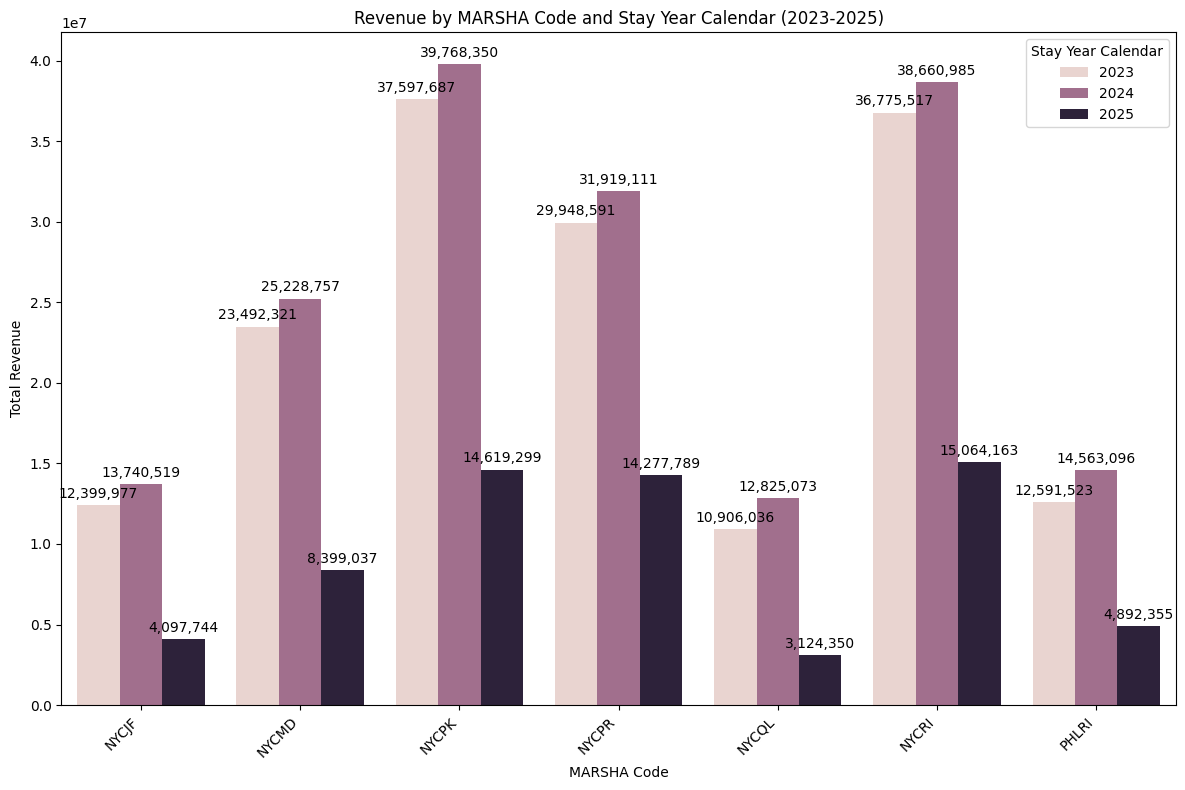

In [34]:
# ss-: plot bar plot of df_grouped_2025, df_grouped_2024, df_grouped_2023 (MARSHA code, revenue, hue Stay Year Calendar), show revenue values

# Combine the dataframes for plotting
df_combined = pd.concat([df_grouped_2025, df_grouped_2024, df_grouped_2023])

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='MARSHA Code', y='Revenue', hue='Stay Year Calendar', data=df_combined)

# Add revenue values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)

plt.title('Revenue by MARSHA Code and Stay Year Calendar (2023-2025)')
plt.xlabel('MARSHA Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Use regression to predict revenue

Converting all data colums to numerical values

In [35]:
df_combined_all = pd.concat([df_2025, df_2024, df_2023])
df_combined_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626773 entries, 2 to 202288
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Stay Year Calendar              626773 non-null  int64  
 1   Stay YYYYMM                     626773 non-null  int64  
 2   Stay DOW Text                   626773 non-null  object 
 3   Stay Date                       626773 non-null  object 
 4   Booking Date                    195844 non-null  object 
 5   MARSHA Code                     626773 non-null  object 
 6   Market Category                 626773 non-null  object 
 7   Market Segment Name for Report  626773 non-null  object 
 8   Market Prfx Name for Report     626773 non-null  object 
 9   Rate Program Code               626773 non-null  object 
 10  Rate Program Name               626773 non-null  object 
 11  Channel Aggregate Name          195844 non-null  object 
 12  Room Pool Code       

create new dataframe which has MARSHA Code = "NYCRI"  Drop columns ("Stay Year Calendar", "RoomNights", "Stay YYYYMM" and "ADR"). Create an index column.


In [36]:
# ss-: create new dataframe which has MARSHA Code = "NYCRI". Drop columns ("Stay Year Calendar", "Stay YYYYMM', "Stay Date', "RoomNights", "ADR"). Create an index column.

# Create the new dataframe filtered by MARSHA Code
df_nycri_processed = df_combined_all[df_combined_all['MARSHA Code'] == 'NYCRI'].copy()

# Define the columns to drop
columns_to_drop = ["Stay Year Calendar", "Booking Date", "RoomNights", "ADR"]

# Drop the specified columns
df_nycri_processed = df_nycri_processed.drop(columns=columns_to_drop, errors='ignore')

# Create an index column (resetting the existing index)
df_nycri_processed = df_nycri_processed.reset_index(drop=True)
df_nycri_processed['index'] = df_nycri_processed.index

# Print info and head of the new dataframe to verify
print("\nInfo of the new df_nycri_processed dataframe:")
df_nycri_processed.info()

print("\nHead of the new df_nycri_processed dataframe:")
print(df_nycri_processed.head())


Info of the new df_nycri_processed dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124219 entries, 0 to 124218
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Stay YYYYMM                     124219 non-null  int64  
 1   Stay DOW Text                   124219 non-null  object 
 2   Stay Date                       124219 non-null  object 
 3   MARSHA Code                     124219 non-null  object 
 4   Market Category                 124219 non-null  object 
 5   Market Segment Name for Report  124219 non-null  object 
 6   Market Prfx Name for Report     124219 non-null  object 
 7   Rate Program Code               124219 non-null  object 
 8   Rate Program Name               124219 non-null  object 
 9   Channel Aggregate Name          43693 non-null   object 
 10  Room Pool Code                  124219 non-null  object 
 11  Revenue                        

ss - Add a column Month to df_nycri_processed value of Month is last two digits of "Stay YYYYMM" column




In [37]:
# ss - Add a column Month to df_nycri_processedm value of Month is last two digits of "Stay YYYYMM" column
df_nycri_processed['Month'] = df_nycri_processed['Stay YYYYMM'].astype(str).str[-2:]
print("\nHead of df_nycri_processed after adding Month column:")
#print(df_nycri_processed.head())
print(df_nycri_processed.info())


Head of df_nycri_processed after adding Month column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124219 entries, 0 to 124218
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Stay YYYYMM                     124219 non-null  int64  
 1   Stay DOW Text                   124219 non-null  object 
 2   Stay Date                       124219 non-null  object 
 3   MARSHA Code                     124219 non-null  object 
 4   Market Category                 124219 non-null  object 
 5   Market Segment Name for Report  124219 non-null  object 
 6   Market Prfx Name for Report     124219 non-null  object 
 7   Rate Program Code               124219 non-null  object 
 8   Rate Program Name               124219 non-null  object 
 9   Channel Aggregate Name          43693 non-null   object 
 10  Room Pool Code                  124219 non-null  object 
 11  Revenue                

Calculate number of unique values of Stay Date" in df_nycri_processed

In [38]:
# ss - Calculate number of unique values of Stay Date" in df_nycri_processed
num_unique_stay_date = df_nycri_processed['Stay Date'].nunique()
print(f"Number of unique values in 'Stay Date': {num_unique_stay_date}")


Number of unique values in 'Stay Date': 1096


In [39]:
# drop Stay YYYYMM" column
df_nycri_processed = df_nycri_processed.drop(columns=['Stay YYYYMM'])
print("\nHead of df_nycri_processed after dropping Stay YYYYMM column:")
print(df_nycri_processed.head())



Head of df_nycri_processed after dropping Stay YYYYMM column:
  Stay DOW Text Stay Date MARSHA Code Market Category  \
0           WED  1-Jan-25       NYCRI       TRANSIENT   
1           WED  1-Jan-25       NYCRI       TRANSIENT   
2           WED  1-Jan-25       NYCRI       TRANSIENT   
3           WED  1-Jan-25       NYCRI       TRANSIENT   
4           WED  1-Jan-25       NYCRI       TRANSIENT   

  Market Segment Name for Report Market Prfx Name for Report  \
0                         Retail          34 eChannel Retail   
1                         Retail          34 eChannel Retail   
2                         Retail          34 eChannel Retail   
3                         Retail          34 eChannel Retail   
4                         Retail          34 eChannel Retail   

  Rate Program Code Rate Program Name Channel Aggregate Name Room Pool Code  \
0              KXPK      B.COM RETAIL               eChannel           STKT   
1              KXPK      B.COM RETAIL              

ss - use  group by "ss - use  group by "Stay Date" on df_nycri_processed YYYYMM" on df_nycri_processed

In [40]:
# ss - use group by "Stay Date" on df_nycri_processed

df_nycri_processed_grouped_date = df_nycri_processed.groupby('Stay Date').sum().reset_index()
print("\nGrouped df_nycri_processed by 'Stay Date':")
#print(df_nycri_processed_grouped_date.head())
print(df_nycri_processed_grouped_date.shape)


Grouped df_nycri_processed by 'Stay Date':
(1096, 13)


In [41]:
# ss - Find number of rows with NaN values in Revenue columns of df_nycri_processed

print("\nNumber of rows with NaN values in 'Revenue' column of df_nycri_processed:")
print(df_nycri_processed_grouped_date['Revenue'].isnull().sum())


Number of rows with NaN values in 'Revenue' column of df_nycri_processed:
0


In [42]:
df_nycri_processed_grouped_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stay Date                       1096 non-null   object 
 1   Stay DOW Text                   1096 non-null   object 
 2   MARSHA Code                     1096 non-null   object 
 3   Market Category                 1096 non-null   object 
 4   Market Segment Name for Report  1096 non-null   object 
 5   Market Prfx Name for Report     1096 non-null   object 
 6   Rate Program Code               1096 non-null   object 
 7   Rate Program Name               1096 non-null   object 
 8   Channel Aggregate Name          1096 non-null   object 
 9   Room Pool Code                  1096 non-null   object 
 10  Revenue                         1096 non-null   float64
 11  index                           1096 non-null   int64  
 12  Month                           10

In [43]:
df_nycri_processed_grouped_date = df_nycri_processed_grouped_date.drop(columns=['Stay Date'])
df_nycri_processed_grouped_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stay DOW Text                   1096 non-null   object 
 1   MARSHA Code                     1096 non-null   object 
 2   Market Category                 1096 non-null   object 
 3   Market Segment Name for Report  1096 non-null   object 
 4   Market Prfx Name for Report     1096 non-null   object 
 5   Rate Program Code               1096 non-null   object 
 6   Rate Program Name               1096 non-null   object 
 7   Channel Aggregate Name          1096 non-null   object 
 8   Room Pool Code                  1096 non-null   object 
 9   Revenue                         1096 non-null   float64
 10  index                           1096 non-null   int64  
 11  Month                           1096 non-null   object 
dtypes: float64(1), int64(1), object(10

In [44]:
# ss - Use sklearn.preprocessing.TargetEncoder to encode all non numeric columns in df_nycri_processed_grouped_date

from sklearn.preprocessing import TargetEncoder

# Drop the 'index' column if it exists as it's not needed for encoding or modeling
if 'index' in df_nycri_processed_grouped_date.columns:
    df_nycri_processed_grouped_date = df_nycri_processed_grouped_date.drop(columns=['index'])

# Explicitly select the object columns to be encoded, excluding 'Stay Date' and 'Stay YYYYMM'
columns_to_encode = ['Stay DOW Text', 'MARSHA Code', 'Market Category',
                     'Market Segment Name for Report', 'Market Prfx Name for Report',
                     'Rate Program Code', 'Rate Program Name', 'Channel Aggregate Name',
                     'Room Pool Code', 'Month']

# Create a temporary dataframe with only the columns to encode and convert them to string type
df_to_encode = df_nycri_processed_grouped_date[columns_to_encode].astype(str)


# Initialize TargetEncoder
target_encoder = TargetEncoder()

# Fit and transform the selected columns
# Use the 'Revenue' column from the grouped dataframe as the target
df_nycri_processed_grouped_date[columns_to_encode] = target_encoder.fit_transform(df_to_encode, df_nycri_processed_grouped_date['Revenue'])

print("\nInfo of df_nycri_processed_grouped_date after Target Encoding:")
df_nycri_processed_grouped_date.info()

print("\nHead of df_nycri_processed_grouped_date after Target Encoding:")
print(df_nycri_processed_grouped_date.head())


Info of df_nycri_processed_grouped_date after Target Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stay DOW Text                   1096 non-null   float64
 1   MARSHA Code                     1096 non-null   float64
 2   Market Category                 1096 non-null   float64
 3   Market Segment Name for Report  1096 non-null   float64
 4   Market Prfx Name for Report     1096 non-null   float64
 5   Rate Program Code               1096 non-null   float64
 6   Rate Program Name               1096 non-null   float64
 7   Channel Aggregate Name          1096 non-null   float64
 8   Room Pool Code                  1096 non-null   float64
 9   Revenue                         1096 non-null   float64
 10  Month                           1096 non-null   float64
dtypes: float64(11)
memory usage: 94



```

```

Use sklearn.preprocessing.TargetEncoder to encode all non numeric columns in df_nycri_processed_grouped_date


Plot correlation of every feature of df_nycri_processed with Revenue

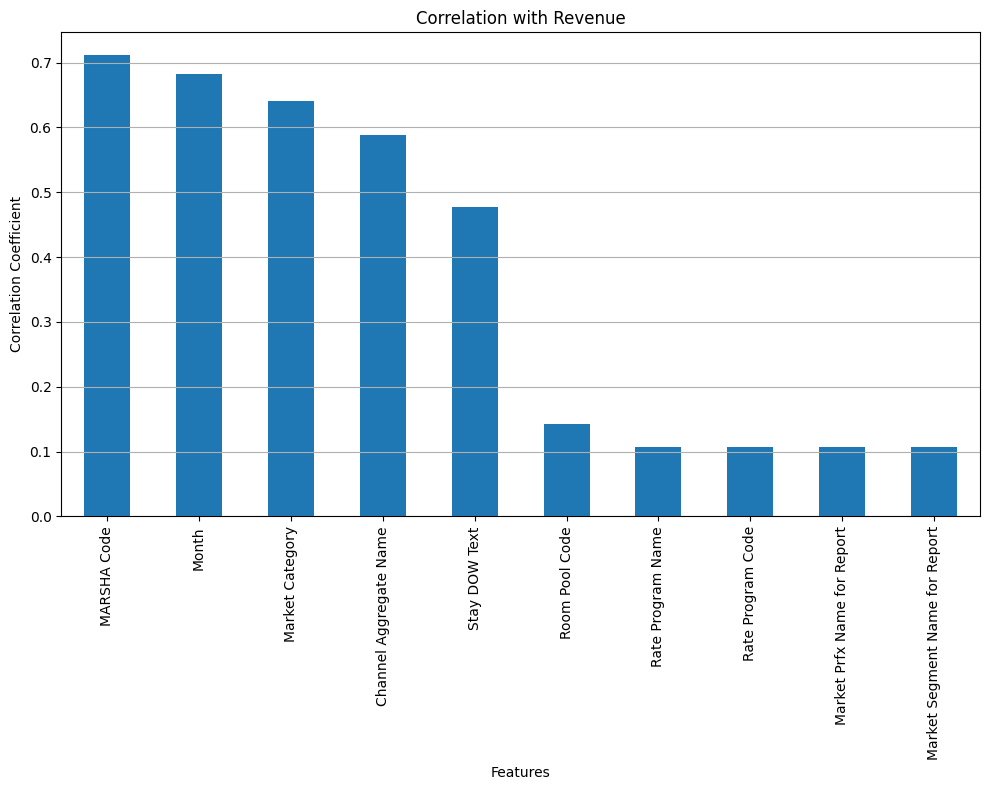

In [45]:
# ss - Plot correlation of every feature of df_nycri_processed with Revenue

# Calculate the correlation of all features with 'Revenue'
correlations = df_nycri_processed_grouped_date.corr()['Revenue'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations.drop('Revenue').plot(kind='bar') # Drop self-correlation
plt.title('Correlation with Revenue')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
df_nycri_processed.head()

,Stay DOW Text,Stay Date,MARSHA Code,Market Category,Market Segment Name for Report,Market Prfx Name for Report,Rate Program Code,Rate Program Name,Channel Aggregate Name,Room Pool Code,Revenue,index,Month
0,WED,1-Jan-25,NYCRI,TRANSIENT,Retail,34 eChannel Retail,KXPK,B.COM RETAIL,eChannel,STKT,807.3,0,01
1,WED,1-Jan-25,NYCRI,TRANSIENT,Retail,34 eChannel Retail,KXPK,B.COM RETAIL,eChannel,STKT,834.3,1,01
2,WED,1-Jan-25,NYCRI,TRANSIENT,Retail,34 eChannel Retail,KXPK,B.COM RETAIL,eChannel,STKT,278.1,2,01
3,WED,1-Jan-25,NYCRI,TRANSIENT,Retail,34 eChannel Retail,XXPA,EXPEDIA.COM HC,eChannel,STKT,309.0,3,01
4,WED,1-Jan-25,NYCRI,TRANSIENT,Retail,34 eChannel Retail,KXPK,B.COM RETAIL,eChannel,STKT,834.3,4,01


create two dataframes X = all columns of df_nycri_processed except Revenue and Index. Y = df_nycri_processed['Revenue'].

In [47]:
# ss - create two dataframes X = all columns of df_nycri_processed except Revenue and Index. Y = df_nycri_processed['Revenue'].

X = df_nycri_processed_grouped_date.drop(['Revenue'], axis=1)
y = df_nycri_processed_grouped_date['Revenue']

print("\nFeatures (X) dataframe:")
print(X.head())

print("\nTarget (y) series:")
print(y.head())


Features (X) dataframe:
   Stay DOW Text   MARSHA Code  Market Category  \
0   82820.344852  82820.344852     82820.344852   
1   94249.550000  81025.499793     34425.116552   
2    3401.000000   2935.128546      2935.128546   
3   83085.532680  80508.482377     83085.532680   
4   82153.049612  75606.990000     82153.049612   

   Market Segment Name for Report  Market Prfx Name for Report  \
0                    82820.344852                 82820.344852   
1                    82820.344852                 82820.344852   
2                     2554.000000                  2554.000000   
3                    83085.532680                 83085.532680   
4                    82153.049612                 82153.049612   

   Rate Program Code  Rate Program Name  Channel Aggregate Name  \
0       82820.344852       82820.344852            82820.344852   
1       82820.344852       82820.344852            82820.344852   
2        2554.000000        2554.000000             3014.239593   
3  

Create linear regression model, fit (X, Y), use StandardScaler, split into test and training data find test and training coefficients and RMSE

In [48]:
# ss - Create linear regression model, fit (X, Y), use StandardScaler, split into test and training data find test and training coefficients and RMSE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print("\n--- Linear Regression Results ---")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print("\nModel Coefficients:")
# Match coefficients to feature names
feature_names = X.columns
for name, coef in zip(feature_names, coefficients):
  print(f"{name}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")


--- Linear Regression Results ---
Training RMSE: 27936.67
Testing RMSE: 25872.36

Model Coefficients:
Stay DOW Text: 2249.5796
MARSHA Code: 10716.9125
Market Category: 5378.5936
Market Segment Name for Report: -482.8878
Market Prfx Name for Report: -482.8878
Rate Program Code: -482.8878
Rate Program Name: -482.8878
Channel Aggregate Name: 12352.3640
Room Pool Code: -4823.5976
Month: 13505.8450
Intercept: 82269.2885


Show Average Revenue and compare it to RMSE

In [49]:
# ss - Show Average Revenue and compare it to RMSE

# Calculate the average revenue from the original combined dataframe
# (Assuming df_combined still exists and contains the relevant data)
average_revenue_combined = df_combined['Revenue'].mean()

# Calculate the average revenue from the NYCRI specific data used for modeling
average_revenue_nycri = y.mean()


print(f"\n--- Average Revenue vs. RMSE ---")
# Print the average revenue from the combined data for context
print(f"Average Revenue (All MARSHA Codes): {average_revenue_combined:.2f}")
# Print the average revenue specifically for NYCRI (the data used for modeling)
print(f"Average Revenue (NYCRI): {average_revenue_nycri:.2f}")
print(f"Testing RMSE (NYCRI Model): {rmse_test:.2f}")

# Comparison statement
print("\nComparison:")
print(f"The Average Revenue for NYCRI is {average_revenue_nycri:.2f}.")
print(f"The model's Testing RMSE is {rmse_test:.2f}.")
if rmse_test < average_revenue_nycri:
    print("The RMSE is smaller than the average revenue, suggesting the model's errors are relatively less than the typical revenue value.")
elif rmse_test == average_revenue_nycri:
     print("The RMSE is equal to the average revenue, suggesting the model's errors are on par with the typical revenue value.")
else:
    print("The RMSE is larger than the average revenue, suggesting the model's errors are relatively significant compared to the typical revenue value.")


--- Average Revenue vs. RMSE ---
Average Revenue (All MARSHA Codes): 19280584.81
Average Revenue (NYCRI): 82573.60
Testing RMSE (NYCRI Model): 25872.36

Comparison:
The Average Revenue for NYCRI is 82573.60.
The model's Testing RMSE is 25872.36.
The RMSE is smaller than the average revenue, suggesting the model's errors are relatively less than the typical revenue value.


Plot Predicted values vs actual value with regression line

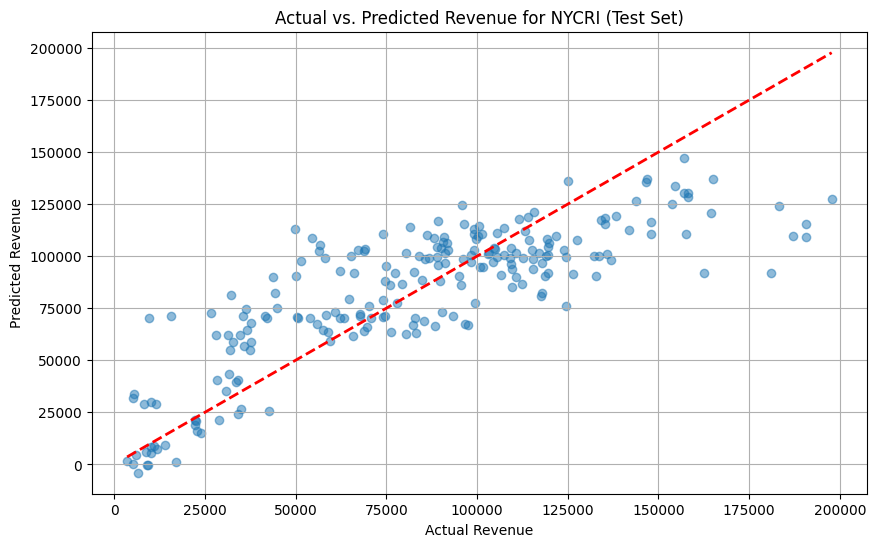

In [50]:
# ss - Plot Predicted values vs actual value with regression line

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)

# Add the regression line (identity line y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue for NYCRI (Test Set)")
plt.grid(True)
plt.show()

Use SFS to select features to minimize RMSE

In [51]:
# ss - Use SFS to select features to minimize RMSE

# Define the base model
lr = LinearRegression()

# Define the SFS object
# `k_features='best'` finds the number of features that minimizes the scoring metric
# `forward=True` means Sequential Forward Selection
# `scoring='neg_mean_squared_error'` is used because SFS maximizes the score;
# minimizing RMSE is equivalent to maximizing negative MSE.
# `cv=5` for 5-fold cross-validation
sfs = SFS(lr,
          k_features='best',
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          cv=5,
          n_jobs=-1) # Use all available cores

# Fit SFS on the scaled training data
sfs = sfs.fit(X_train_scaled, y_train)

# Get the results as a pandas DataFrame
sfs_results = pd.DataFrame(sfs.get_metric_dict()).T

sfs_results.info()

sfs_results.head()


# Get the names of the best features
best_features = sfs.k_feature_names_
print(f"\nBest features selected by SFS: {best_features}")

# Get the indices of the best features
best_feature_indices = sfs.k_feature_idx_
print(f"Indices of the best features: {best_feature_indices}")

# Optionally, train a new model with the best features and evaluate
X_train_best = X_train_scaled[:, list(best_feature_indices)]
X_test_best = X_test_scaled[:, list(best_feature_indices)]

model_sfs = LinearRegression()
model_sfs.fit(X_train_best, y_train)

y_train_pred_sfs = model_sfs.predict(X_train_best)
y_test_pred_sfs = model_sfs.predict(X_test_best)

rmse_train_sfs = np.sqrt(mean_squared_error(y_train, y_train_pred_sfs))
rmse_test_sfs = np.sqrt(mean_squared_error(y_test, y_test_pred_sfs))

print(f"\n--- Model trained with SFS Selected Features ---")
print(f"Training RMSE (SFS features): {rmse_train_sfs:.2f}")
print(f"Testing RMSE (SFS features): {rmse_test_sfs:.2f}")
print(f"Model Coefficients (SFS features): {model_sfs.coef_}")
print(f"Intercept (SFS features): {model_sfs.intercept_}")



<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   feature_idx    10 non-null     object
 1   cv_scores      10 non-null     object
 2   avg_score      10 non-null     object
 3   feature_names  10 non-null     object
 4   ci_bound       10 non-null     object
 5   std_dev        10 non-null     object
 6   std_err        10 non-null     object
dtypes: object(7)
memory usage: 640.0+ bytes

Best features selected by SFS: ('0', '1', '2', '7', '8', '9')
Indices of the best features: (0, 1, 2, 7, 8, 9)

--- Model trained with SFS Selected Features ---
Training RMSE (SFS features): 27964.62
Testing RMSE (SFS features): 25897.81
Model Coefficients (SFS features): [ 2228.95681317 10811.37300592  5431.0016245  12089.42235179
 -6170.70327761 13518.85580072]
Intercept (SFS features): 82269.28845890412


In [52]:
# ss: Map sfs best feature names to original features and print them

# Map the sfs_best_features (which are indices from the scaled array) back to the original feature names
original_feature_names = X.columns
sfs_best_feature_names_mapped = [original_feature_names[i] for i in best_feature_indices]

print("\nMapping of SFS best feature indices to original feature names:")
for idx, name in zip(best_feature_indices, sfs_best_feature_names_mapped):
    print(f"Index {idx}: {name}")

print("\nSFS Best Feature Names (Mapped to original features):")
sfs_best_feature_names_mapped


Mapping of SFS best feature indices to original feature names:
Index 0: Stay DOW Text
Index 1: MARSHA Code
Index 2: Market Category
Index 7: Channel Aggregate Name
Index 8: Room Pool Code
Index 9: Month

SFS Best Feature Names (Mapped to original features):


['Stay DOW Text',
 'MARSHA Code',
 'Market Category',
 'Channel Aggregate Name',
 'Room Pool Code',
 'Month']

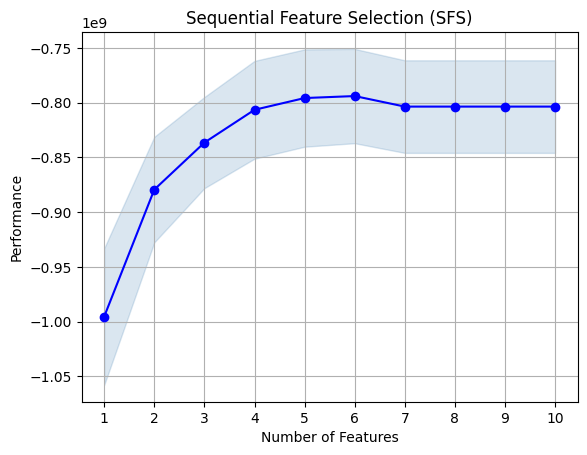

In [53]:
# ss - plot sfs to show best selection

# ss - Plot the SFS results to visualize the score vs number of features
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Feature Selection (SFS)')
plt.grid()
plt.show()


--- Permutation Importance Features ---
                          Feature  Importance Mean  Importance Std
0  Market Segment Name for Report         0.000070        0.000030
1               Rate Program Name         0.000070        0.000030
2               Rate Program Code         0.000070        0.000030
3     Market Prfx Name for Report         0.000070        0.000030
4                  Room Pool Code         0.000579        0.000231
5                   Stay DOW Text         0.008823        0.002925
6                 Market Category         0.030374        0.008558
7          Channel Aggregate Name         0.118827        0.014142
8                     MARSHA Code         0.127915        0.013073
9                           Month         0.212433        0.026163


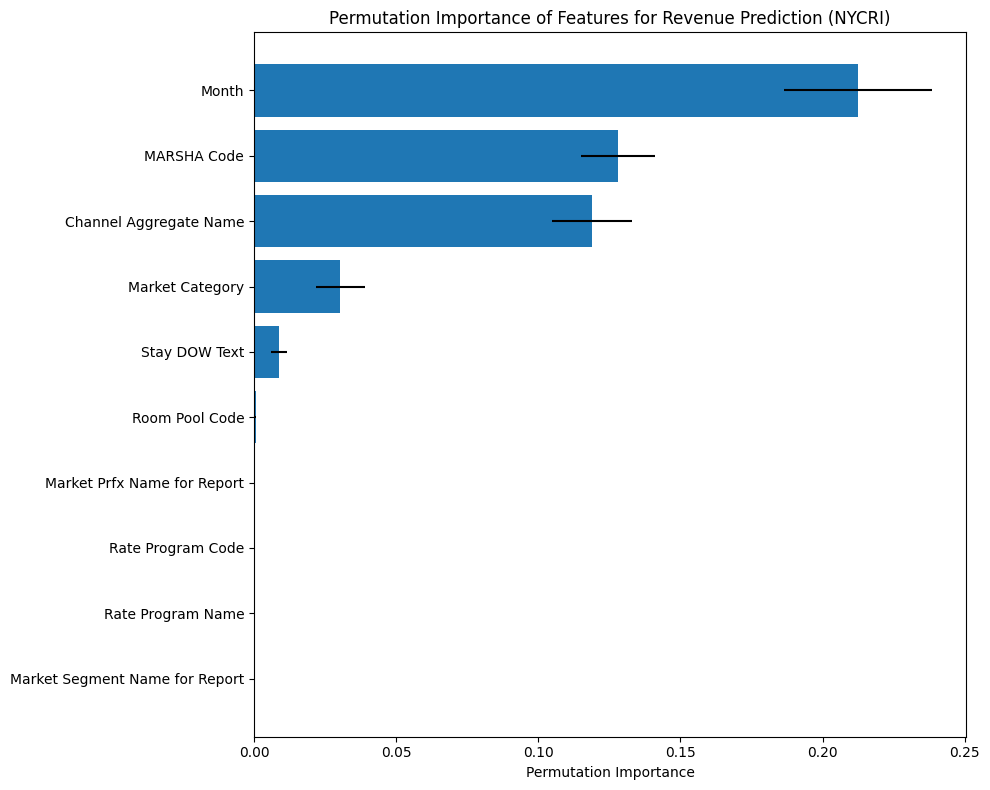

In [54]:
# ss -  Use SFS to select features to minimize RMSE  and show permutation importance features


result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importance scores
sorted_idx = result.importances_mean.argsort()

# Map indices back to original feature names
full_feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': full_feature_names[sorted_idx],
    'Importance Mean': result.importances_mean[sorted_idx],
    'Importance Std': result.importances_std[sorted_idx]
})

print("\n--- Permutation Importance Features ---")
print(importance_df)

# Plot permutation importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'], xerr=importance_df['Importance Std'])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features for Revenue Prediction (NYCRI)")
plt.tight_layout()
plt.show()


Use SFS and Gridsearchcv to select the best features of regression model


In [55]:
# ss- Use SFS and Gridsearchcv to select the best features of regression model


# Define the base model
lr = LinearRegression()


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfs', SFS(lr,
                k_features=X_train.shape[1], # Set k_features to the maximum number initially
                forward=True,
                floating=False,
                scoring='neg_mean_squared_error',
                cv=5,
                n_jobs=-1)),
    ('model', lr)
])

# Define the parameter grid for GridSearchCV
# will search for the best number of features (k_features) for the SFS step
# The range of k_features should be from 1 to the total number of features
param_grid = {
    'sfs__k_features': list(range(1, X_train.shape[1] + 1))
}

# Initialize GridSearchCV
# use the negative mean squared error as the scoring metric to minimize RMSE
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best number of features and the best score (negative MSE)
best_k_features = grid_search.best_params_['sfs__k_features']
best_neg_mse = grid_search.best_score_
best_rmse_gridsearch = np.sqrt(-best_neg_mse)

print("\n--- SFS with GridSearchCV Results ---")
print(f"Best number of features found by GridSearchCV: {best_k_features}")
print(f"Best cross-validated negative MSE: {best_neg_mse:.4f}")
print(f"Best cross-validated RMSE: {best_rmse_gridsearch:.2f}")

# Get the best SFS estimator from the grid search
best_sfs_estimator = grid_search.best_estimator_.named_steps['sfs']

# Get the names of the best features based on the best SFS run
best_features_gridsearch = [X.columns[i] for i in best_sfs_estimator.k_feature_idx_]
print(f"\nBest features selected by SFS with GridSearchCV: {best_features_gridsearch}")

# Evaluate the best model (the one trained with the best k_features from the best estimator)
# The best estimator from GridSearchCV is already trained on the full training data
# and uses the optimal parameters found.
best_model_gridsearch = grid_search.best_estimator_
y_test_pred_gridsearch = best_model_gridsearch.predict(X_test)

rmse_test_gridsearch = np.sqrt(mean_squared_error(y_test, y_test_pred_gridsearch))

print(f"\nTesting RMSE with the best model from GridSearchCV (using {best_k_features} features): {rmse_test_gridsearch:.2f}")

final_model_coef = best_model_gridsearch.named_steps['model'].coef_
final_model_intercept = best_model_gridsearch.named_steps['model'].intercept_

print("\nCoefficients of the final model (scaled features):")
# Map coefficients back to the selected feature names
for name, coef in zip(best_features_gridsearch, final_model_coef):
    print(f"{name}: {coef:.4f}")
print(f"Intercept: {final_model_intercept:.4f}")



--- SFS with GridSearchCV Results ---
Best number of features found by GridSearchCV: 10
Best cross-validated negative MSE: -803558043.9514
Best cross-validated RMSE: 28347.10

Best features selected by SFS with GridSearchCV: ['Stay DOW Text', 'MARSHA Code', 'Market Category', 'Market Segment Name for Report', 'Market Prfx Name for Report', 'Rate Program Code', 'Rate Program Name', 'Channel Aggregate Name', 'Room Pool Code', 'Month']

Testing RMSE with the best model from GridSearchCV (using 10 features): 25872.36

Coefficients of the final model (scaled features):
Stay DOW Text: 2249.5796
MARSHA Code: 10716.9125
Market Category: 5378.5936
Market Segment Name for Report: -482.8878
Market Prfx Name for Report: -482.8878
Rate Program Code: -482.8878
Rate Program Name: -482.8878
Channel Aggregate Name: 12352.3640
Room Pool Code: -4823.5976
Month: 13505.8450
Intercept: 82269.2885


ss - Use Random Forest with Linear Regression to create a higher degree model and minimize RMSE

In [56]:
# ss - Use Random Forest Regressor to predict revenue and minimize RMSE

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# You can adjust parameters like n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model to the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled training and testing data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate RMSE for training and testing data
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Print the results
print("\n--- Random Forest Regressor Results ---")
print(f"Training RMSE: {rmse_train_rf:.2f}")
print(f"Testing RMSE: {rmse_test_rf:.2f}")

# Optionally, print feature importances from the Random Forest model
print("\nRandom Forest Feature Importances:")
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


--- Random Forest Regressor Results ---
Training RMSE: 13137.96
Testing RMSE: 23486.67

Random Forest Feature Importances:
Market Category                   0.459410
MARSHA Code                       0.178238
Month                             0.141849
Channel Aggregate Name            0.105116
Stay DOW Text                     0.095974
Room Pool Code                    0.003948
Market Segment Name for Report    0.003894
Rate Program Name                 0.003888
Market Prfx Name for Report       0.003886
Rate Program Code                 0.003797
dtype: float64


Plot Randomforest results with actual values along with a regression line.

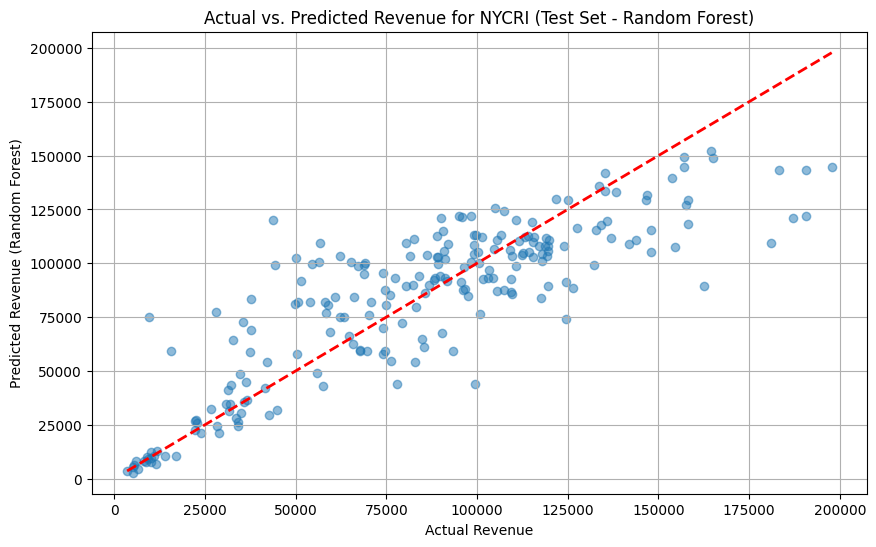

In [57]:
# ss - Plot Randomforest results with actual values along with a regression line.

# Plotting Actual vs. Predicted values for Random Forest
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values from Random Forest
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)

# Add the regression line (identity line y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue (Random Forest)")
plt.title("Actual vs. Predicted Revenue for NYCRI (Test Set - Random Forest)")
plt.grid(True)
plt.show()

Compare Linear Regression RMSE with Random Forest RMSE and list out the most important features along with coefficients.

In [58]:
# ss - Compare Linear Regression RMSE with Random Forest RMSE and list out the most important features along with coefficients.

print("\n--- Model Comparison ---")
print(f"Linear Regression Testing RMSE: {rmse_test:.2f}")
print(f"Random Forest Regressor Testing RMSE: {rmse_test_rf:.2f}")

print("\n--- Feature Importance and Coefficients ---")

# Get the most important features from the Random Forest model (e.g., top 5)
top_n_features = 5
most_important_rf_features = feature_importances.sort_values(ascending=False).head(top_n_features)

print(f"\nTop {top_n_features} Most Important Features (from Random Forest):")
print(most_important_rf_features.to_markdown())

# Get the coefficients from the Linear Regression model
linear_regression_coefficients = pd.Series(model.coef_, index=X.columns)

print(f"\nLinear Regression Coefficients for Top {top_n_features} Features:")
# Print coefficients for the features identified as most important by Random Forest
print(linear_regression_coefficients.loc[most_important_rf_features.index].to_markdown())


--- Model Comparison ---
Linear Regression Testing RMSE: 25872.36
Random Forest Regressor Testing RMSE: 23486.67

--- Feature Importance and Coefficients ---

Top 5 Most Important Features (from Random Forest):
|                        |         0 |
|:-----------------------|----------:|
| Market Category        | 0.45941   |
| MARSHA Code            | 0.178238  |
| Month                  | 0.141849  |
| Channel Aggregate Name | 0.105116  |
| Stay DOW Text          | 0.0959738 |

Linear Regression Coefficients for Top 5 Features:
|                        |        0 |
|:-----------------------|---------:|
| Market Category        |  5378.59 |
| MARSHA Code            | 10716.9  |
| Month                  | 13505.8  |
| Channel Aggregate Name | 12352.4  |
| Stay DOW Text          |  2249.58 |


Tune  the hyperparameters of the Random Forest model to potentially improve its performance further

In [59]:
# ss - Tune the hyperparameters of the Random Forest model to potentially improve its performance further

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
# We use neg_mean_squared_error as the scoring metric to minimize RMSE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_neg_mse = grid_search.best_score_
best_rmse_tuned = np.sqrt(-best_neg_mse)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Parameters found by GridSearchCV: {best_params}")
print(f"Best cross-validated negative MSE: {best_neg_mse:.4f}")
print(f"Best cross-validated RMSE: {best_rmse_tuned:.2f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_test_pred_tuned = best_rf_model.predict(X_test_scaled)
rmse_test_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))

print(f"\nTesting RMSE with Tuned Random Forest Model: {rmse_test_tuned:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Hyperparameter Tuning Results ---
Best Parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated negative MSE: -684152628.5238
Best cross-validated RMSE: 26156.31

Testing RMSE with Tuned Random Forest Model: 23595.91


Show coefficients and features of the best Tuned Random Forest model and plot it with actual values and RMSE line. Print RMSE.